# Gatsiva Resiliency Chart Example

This notebook shows how to use and visualize the Gatsiva [Return Profile](https://gatsiva.com/docs/#condition-return-profile) transaction with Matplot to create a chart of returns after a 10% correction for major cryptocurrencies.

API access is **currently limited to beta testers and collaborators**. For more information on how to utilize the Gatsiva API or to request access and an API key, please visit the [Gatsiva Website](https://gatsiva.com). For more information on the Gatsiva API, please visit the [Gatsiva API Documentation](https://gatsiva.com/docs).

## Enter Input Information Here

In [1]:
symbol_list = ['BTC:USD:daily','ETH:USD:daily','XRP:USD:daily','LTC:USD:daily','DASH:USD:daily','STRAT:USD:daily']
condition = 'price change percentage(1) < -0.10'

periods = 60
usingdatafrom = "2017-01-01"
usingdatato = "2018-02-02"

# API key for Gatsiva
apikey = "<your_api_key>"

In [2]:
# Install Prerequesities if needed
#
# Run this (uncomment below) to install / upgrade Plotly
#!pip install plotly --upgrade
#!pip install colorlover

In [3]:
# Import utility libraries we will need
import requests
import json
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Ignore warnings
warnings.filterwarnings('ignore')

my_xticks = np.arange(7,periods,7)

In [4]:
data_run_list = [] # List for mean return information
obs_num_list = [] # List for storing number of observations in each run

In [5]:
# Setup the headers for the request
bearer_token = 'Bearer ' + apikey
my_headers = {'Accept': 'application/json', 'Authorization': bearer_token}

In [6]:
for symbol in symbol_list:

    # Print our progress
    print('Running symbol ' + symbol);
    
    # Form the request
    request_data = {'symbol':symbol,'condition_id':1,'condition':condition,"periods":periods,'from':usingdatafrom,'to':usingdatato}

    # Send the request
    analytic = requests.post('https://api.gatsiva.com/api/v1/conditions/return_profile',json=request_data,headers=my_headers)

    # Pull out the results and format it into a pandas data frame
    results = analytic.json()['results']
    
    df = pd.read_json(json.dumps(results), orient='records')

    # Add the mean and number of observations to our list
    data_run_list.append(df['mean'])   
    obs_num_list.append(results[0]['n'])
    

Running symbol BTC:USD:daily
Running symbol ETH:USD:daily
Running symbol XRP:USD:daily
Running symbol LTC:USD:daily
Running symbol DASH:USD:daily
Running symbol STRAT:USD:daily


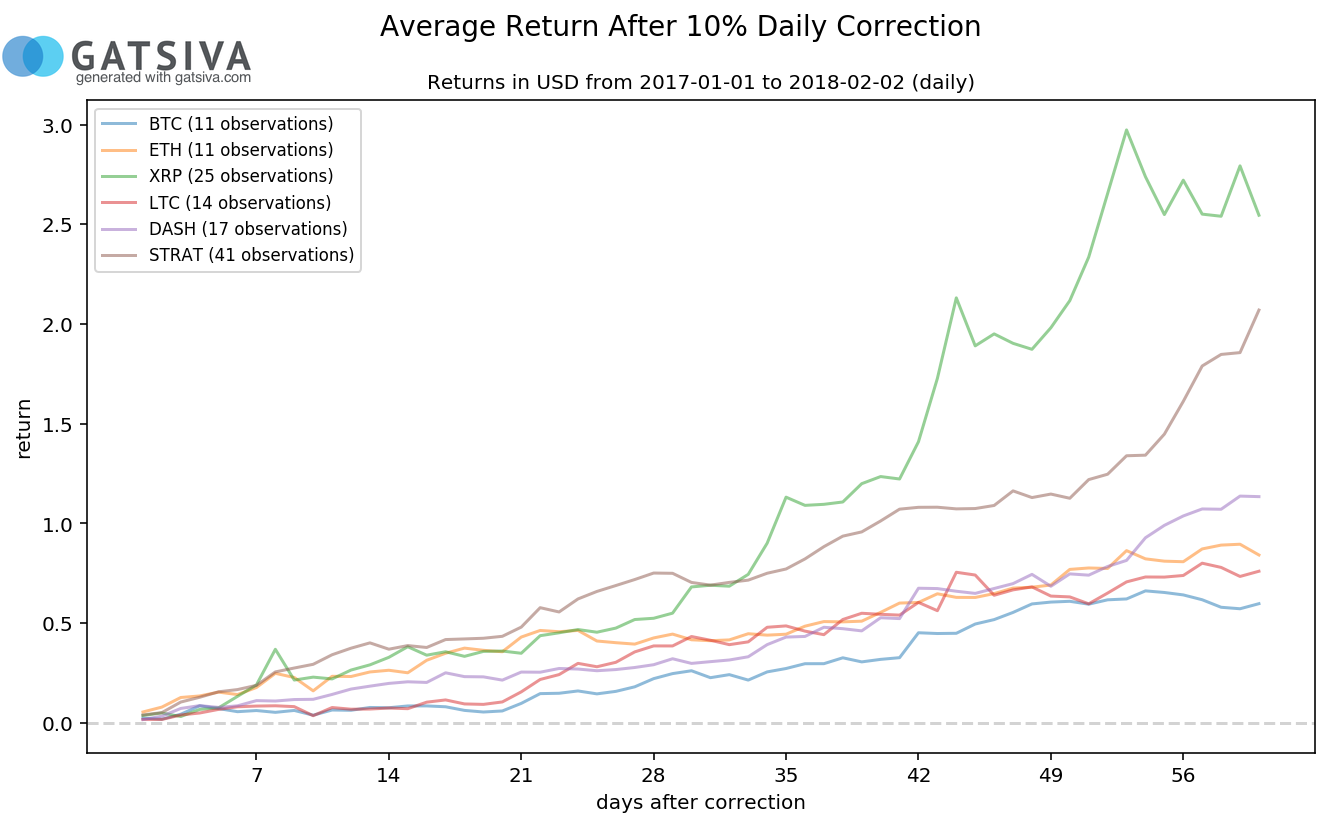

In [7]:
# Now plot the results
plt.figure(figsize=(11,6), dpi=144, facecolor='white')
plt.axhline(color='lightgrey', linestyle='--', label='_nolegend_')

#plt.text(5,5,'generated with gatsiva.com')

i=0
while i < len(symbol_list):
    plt.plot(df['returnperiod'], data_run_list[i], alpha=0.5, label=symbol_list[i].split(':')[0] + ' (' + str(obs_num_list[i]) + ' observations)')
    i = i+1
    
# Now clean up the chart with some labels
plt.xlabel('days after correction')
plt.ylabel('return')
plt.title('Returns in USD from ' + usingdatafrom + ' to ' + usingdatato + ' (daily)', fontsize=10)
plt.suptitle('Average Return After 10% Daily Correction', fontsize=14)
plt.legend(fontsize='small')
plt.xticks(my_xticks)
plt.show()



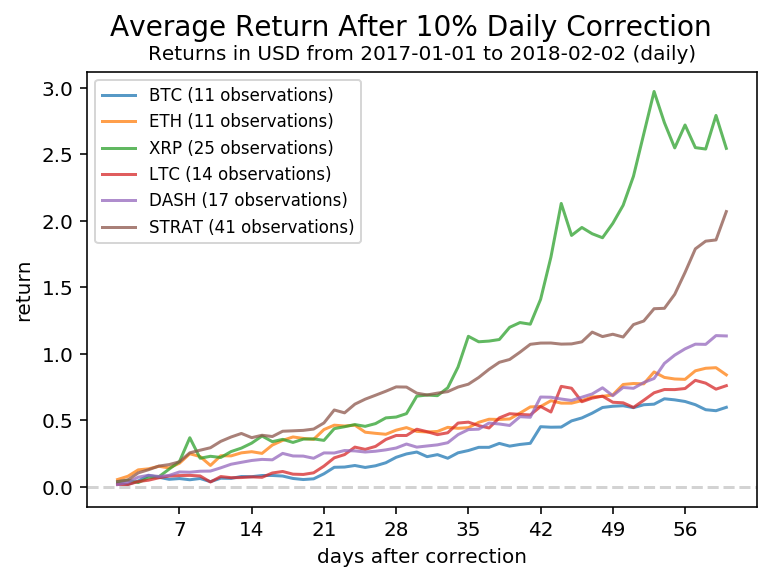

In [8]:
# Now plot the results
plt.figure(figsize=(6,4), dpi=144, facecolor='white')
plt.axhline(color='lightgrey', linestyle='--', label='_nolegend_')


i=0
while i < len(symbol_list):
    plt.plot(df['returnperiod'], data_run_list[i], alpha=0.75, label=symbol_list[i].split(':')[0] + ' (' + str(obs_num_list[i]) + ' observations)')
    i = i+1
    
# Now clean up the chart with some labels
plt.xlabel('days after correction')
plt.ylabel('return')
plt.title('Returns in USD from ' + usingdatafrom + ' to ' + usingdatato + ' (daily)', fontsize=10)
plt.suptitle('Average Return After 10% Daily Correction', fontsize=14)
plt.legend(fontsize='small')
plt.xticks(my_xticks)
plt.show()
